In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')
fch=pd.read_csv('/content/drive/My Drive/decathlon.csv')


Mounted at /content/drive/


In [ ]:
# 2. Explication des données
print(fch.columns.tolist())  # Affiche les noms des colonnes
print("Premières lignes du dataset :")
print(fch.head())

print("\nInformations sur les données :")
print(fch.info())

print("\nDescription statistique des données :")
print(fch.describe())


['Athlets', '100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', '1500m', 'Rank', 'Points', 'Competition']
Premières lignes du dataset :
   Athlets   100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
0   SEBRLE  11.04       7.58     14.83       2.07  49.81        14.69   43.75   
1     CLAY  10.76       7.40     14.26       1.86  49.37        14.05   50.72   
2   KARPOV  11.02       7.30     14.77       2.04  48.37        14.09   48.95   
3  BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
4   YURKOV  11.34       7.09     15.19       2.10  50.42        15.31   46.26   

   Pole.vault  Javeline  1500m  Rank  Points Competition  
0        5.02     63.19  291.7     1    8217    Decastar  
1        4.92     60.15  301.5     2    8122    Decastar  
2        4.92     50.31  300.2     3    8099    Decastar  
3        5.32     62.77  280.1     4    8067    Decastar  
4        4.72     63.44  276.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Sélectionner les colonnes numériques pour l'ACP
features = fch.select_dtypes(include=[np.number]).columns
X = fch[features].values

#  Sélectionner les colonnes correspondant aux performances (10 colonnes)
performance_columns = fch.columns[1:11]

#  Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fch[performance_columns])


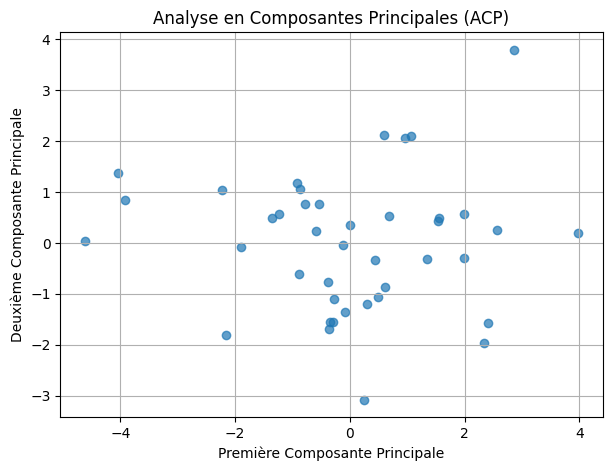

Variance expliquée par chaque composante : [0.32719055 0.1737131  0.14049167 0.10568504 0.06847735 0.05992687
 0.04512353 0.03968766 0.02148149 0.01822275]
Variance cumulée : [0.32719055 0.50090366 0.64139532 0.74708036 0.81555771 0.87548458
 0.92060811 0.96029577 0.98177725 1.        ]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#  Réaliser l'ACP
pca = PCA(n_components=10)  # Nous choisissons de réduire à 2 dimensions
X_pca = pca.fit_transform(X_scaled)  # Transforme les données

#  Visualiser les résultats de l'ACP
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('Analyse en Composantes Principales (ACP)')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.grid()
plt.show()


explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance cumulée :", np.cumsum(explained_variance))

fch_selected = fch[performance_columns.tolist() + ['Rank', 'Points', 'Competition']]


<ipython-input-17-c658515a90cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance_percentage, palette='viridis')


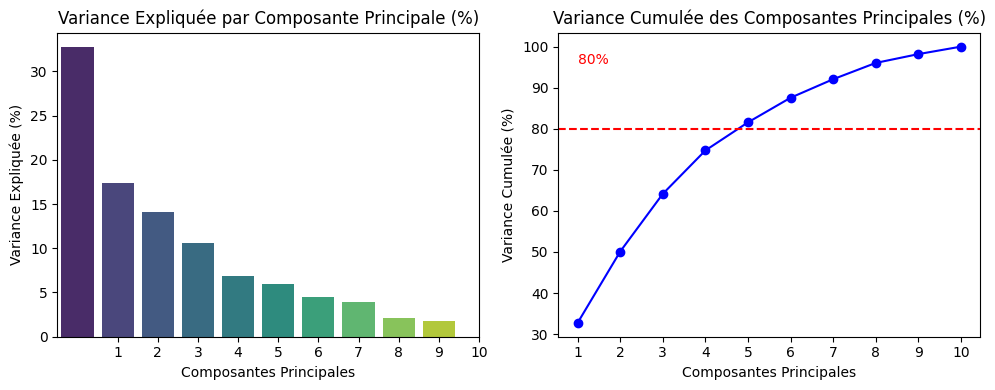

In [ ]:
import seaborn as sns
cumulative_variance = np.cumsum(explained_variance)
# Conversion en pourcentage
explained_variance_percentage = explained_variance * 100
cumulative_variance_percentage = cumulative_variance * 100
# Création du graphique
plt.figure(figsize=(10, 4))
# Graphique de la variance expliquée par chaque composante
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance_percentage, palette='viridis')
plt.title('Variance Expliquée par Composante Principale (%)')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée (%)')
plt.xticks(ticks=np.arange(1, len(explained_variance) + 1), labels=np.arange(1, len(explained_variance) + 1))
# Graphique de la variance cumulée
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance_percentage, marker='o', color='b')
plt.title('Variance Cumulée des Composantes Principales (%)')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Cumulée (%)')
plt.xticks(ticks=np.arange(1, len(cumulative_variance) + 1), labels=np.arange(1, len(cumulative_variance) + 1))
plt.axhline(y=80, color='r', linestyle='--')
plt.text(1, 95, '80%', color='red', verticalalignment='bottom')
plt.tight_layout()
plt.show()

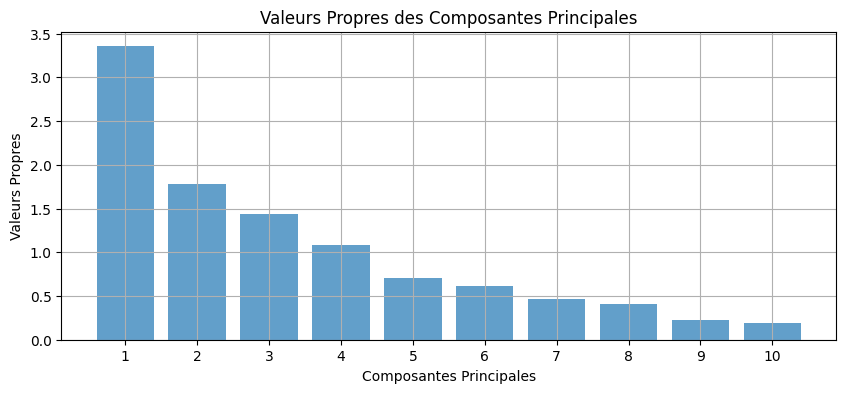

In [ ]:
# Valeurs propres
eigenvalues = pca.explained_variance_
# Tracer les valeurs propres
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7)
plt.title('Valeurs Propres des Composantes Principales')
plt.xlabel('Composantes Principales')
plt.ylabel('Valeurs Propres')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.show()


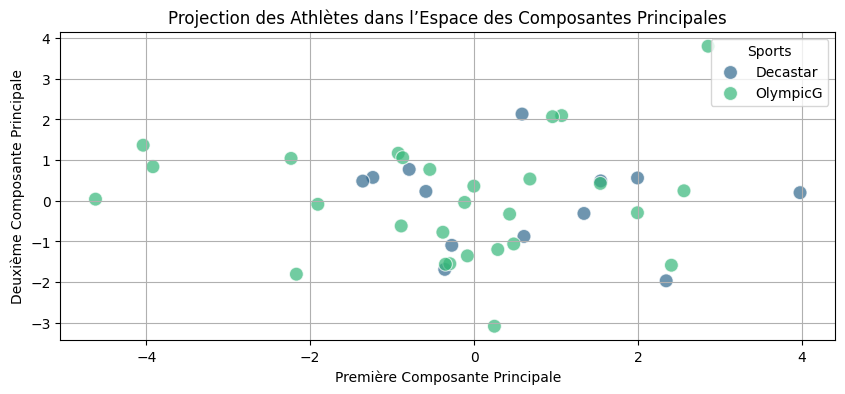

In [ ]:
import seaborn as sns


sports = fch_selected['Competition']

# Créer le graphique de dispersion
plt.figure(figsize=(10, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=sports, palette='viridis', s=100, alpha=0.7)

plt.title('Projection des Athlètes dans l’Espace des Composantes Principales')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.grid()
plt.legend(title='Sports')
plt.show()


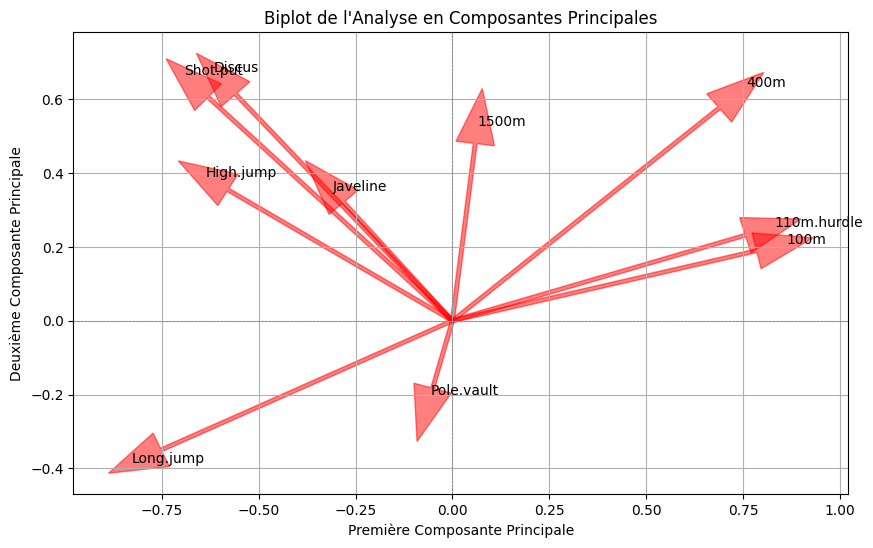

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des vecteurs de chargement
loading_vectors = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer le graphique de biplot
plt.figure(figsize=(10, 6))

# Ajouter les flèches pour les variables
for i in range(loading_vectors.shape[0]):
    plt.arrow(0, 0, loading_vectors[i, 0], loading_vectors[i, 1],
              color='red', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(loading_vectors[i, 0]*1.1, loading_vectors[i, 1]*1.1, f'{performance_columns[i]}', color='black')

plt.title('Biplot de l\'Analyse en Composantes Principales')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.show()


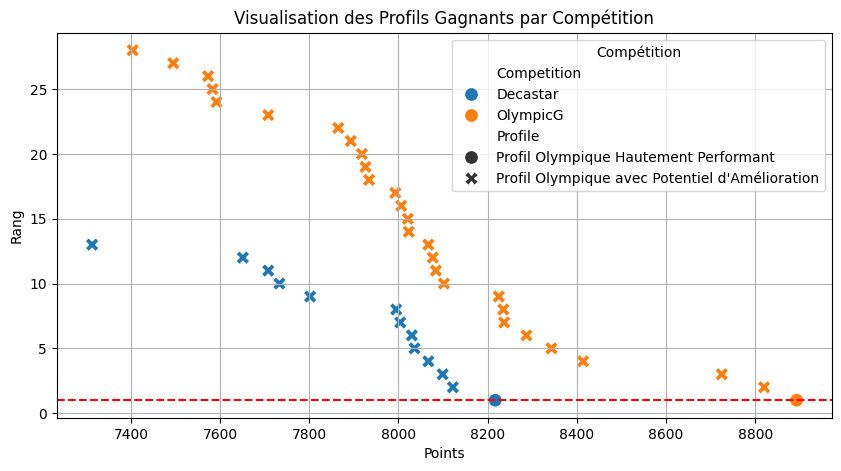

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def define_profile(row):
    if row['Rank'] == 1:
        return 'Profil Olympique Hautement Performant'
    elif row['Points'] > 800:
        return 'Profil Olympique avec Potentiel d\'Amélioration'
    elif row['Competition'] == 'Decastar':
        return 'Profil Décastar Multidisciplinaire'
    else:
        return 'Profil Décastar avec Zones d\'Amélioration'

# Appliquer la fonction à chaque ligne pour créer une nouvelle colonne 'Profile'
fch_selected['Profile'] = fch_selected.apply(define_profile, axis=1)
# Visualisation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=fch_selected, x='Points', y='Rank', hue='Competition', style='Profile', s=100)

plt.title('Visualisation des Profils Gagnants par Compétition')
plt.xlabel('Points')
plt.ylabel('Rang')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.legend(title='Compétition')
plt.show()
